In [1]:
from utils_excel import read_log_databaseloader as databaseloader
import numpy as np
from utils_calculation import calculator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# check_line_list = [3,103,203,303,403,503,603,703,803,903,1003,1122]
check_line_list = [803,903,3,303,403,503,103,203,1003,1103,1203,1303,703,603]
# check_line_list = [503,103,203,1203,1303]
bar_width = 0.4

save_root_path = 'statistics_figure_int8_running_efficiency/'
rld_uq = databaseloader(file_path='../log/arc3_test_float32_model_running_effciency_cpu.xls', sheet_index=1)
rld = databaseloader(file_path='../log/arc3_test_model_running_effciency_cpu_quantized_model.xls')
c = calculator()


In [2]:
def get_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5_quantization', 'shufflenet_v2_x1_0_quantization', 'mobilenetv2_quantization', 'resnet18_quantization', 'resnet34_quantization', 'resnet50_quantization', 'resnet101_quantization', 'resnet152_quantization', 'vgg11_bn_quantization', 'vgg13_bn_quantization', 'vgg16_bn_quantization', 'vgg19_bn_quantization', 'resnext50_32x4d_quantization', 'resnext101_32x8d_quantization']
[7.248086, 13.525937, 12.836484, 24.66668, 43.235275, 54.308556, 95.202225, 130.00273, 135.52383, 135.49684, 145.96101, 157.19669, 50.654373, 177.23277]
[0.1130301859137477, 0.11896007740015868, 0.18525067430193154, 0.17314734634656048, 1.5275277709975086, 1.123891708769456, 2.0936825358023583, 2.556769054088079, 2.6942129494099447, 2.780253389228733, 2.7878889110649823, 2.5856385956587076, 1.5695092146401493, 2.908365889077203]
[7.211689185042593, 13.504991563833727, 12.781497576021776, 24.643378310701298, nan, 53.06672964337509, 93.96488005156944, 128.84221376663515, 134.30416037366967, 134.206199109

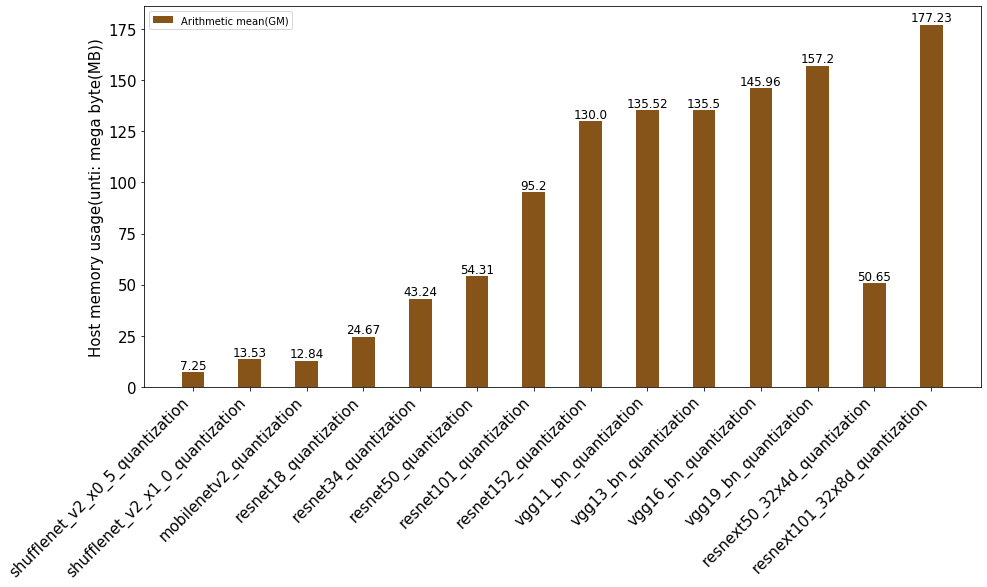

In [3]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_host_memory_usage_data(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)

x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar = plt.bar(x, model_mean_list, bar_width, color=(135/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, model_mean_list):
    plt.text(x_axis, b+0.0015, round(b, 2), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Host memory usage(unti: mega byte(MB))', fontsize = 15)
plt.savefig(save_root_path + "Host memory usage.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [4]:
def get_float32_host_memory_usage_data(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_uq.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld_uq.find_special_line_id(model_path)
        current_model_result_list = rld_uq.read_line_vector(rld_uq.read_model_host_memory_usage,select_model_id_list)
        # #mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        # #Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'mobilenetv2', 'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'vgg11_bn', 'vgg13_bn', 'vgg16_bn', 'vgg19_bn', 'resnext50_32x4d', 'resnext101_32x8d']
[-479.33997    29.246664  -10.947407   63.9861     53.813957   57.54116
   65.38812    67.1519     70.55437    71.90823    70.9679     69.79052
   53.21328    66.85226 ]


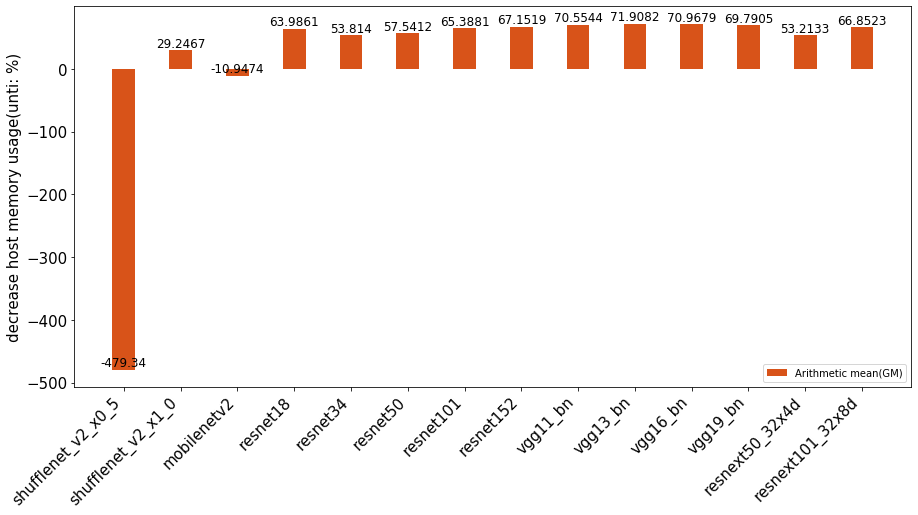

In [5]:
model_name_list, float32_model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_float32_host_memory_usage_data(check_line_list)

decrease_memory_usage =  (1 - np.array(model_mean_list)/ np.array(float32_model_mean_list))*100
print(model_name_list)
print(decrease_memory_usage)
x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar = plt.bar(x, decrease_memory_usage, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_memory_usage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='lower right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('decrease host memory usage(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "decrease host memory usage.png",dpi=500,bbox_inches = 'tight')

In [6]:
def get_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5_quantization', 'shufflenet_v2_x1_0_quantization', 'mobilenetv2_quantization', 'resnet18_quantization', 'resnet34_quantization', 'resnet50_quantization', 'resnet101_quantization', 'resnet152_quantization', 'vgg11_bn_quantization', 'vgg13_bn_quantization', 'vgg16_bn_quantization', 'vgg19_bn_quantization', 'resnext50_32x4d_quantization', 'resnext101_32x8d_quantization']
[2.7292774, 2.8092728, 2.6220796, 1.6446778, 1.8713028, 2.2456348, 3.4286942, 5.3406625, 2.8571692, 2.8820758, 3.020095, 3.076945, 2.3658128, 4.5002546]
[0.010278941039993938, 0.01339532081109951, 0.014639630123876035, 0.014133153841525692, 0.025507082712952878, 0.014699862783976503, 0.02956156016363165, 0.020452810764392204, 0.029423556660498118, 0.03319036420669663, 0.08706299420748698, 0.019075651340960675, 0.011410929819112514, 0.019321863574740306]
[2.728590029163806, 2.8081290188875827, 2.6206683781314313, 1.6426237947597002, 1.8667811416922235, 2.2439785121341935, 3.4247038211208363, 5.339262739

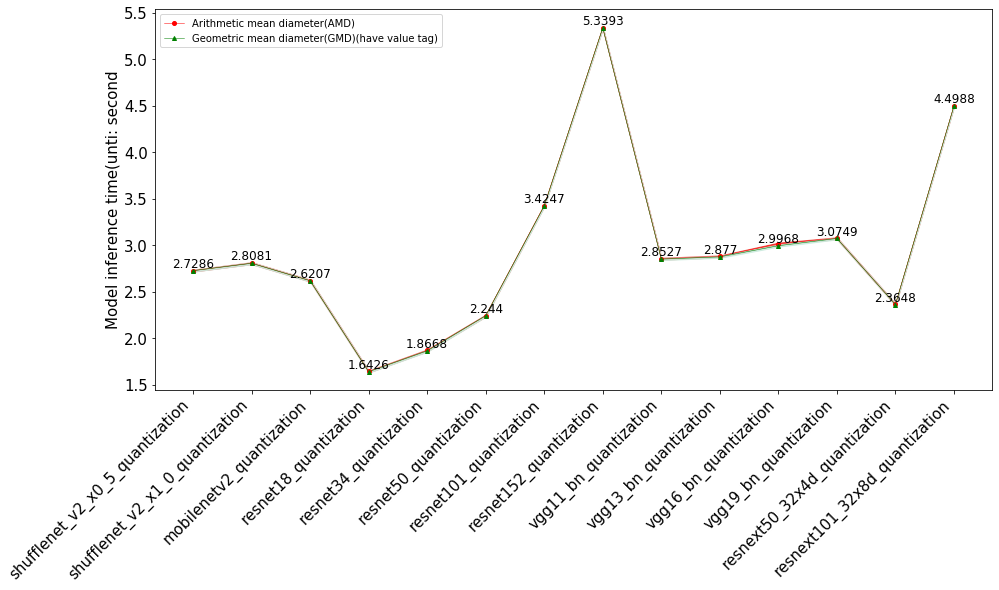

In [7]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_inference_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model inference time(unti: second', fontsize = 15)
plt.savefig(save_root_path + "Model inference time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [8]:
def get_float32_model_inference_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_uq.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld_uq.find_special_line_id(model_path)
        current_model_result_list = rld_uq.read_line_vector(rld_uq.read_Inference_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[-60.66146   -60.847687  -41.941357    0.601238    1.7341495  -8.740902
 -27.239466  -64.208206   30.860245   32.4833     19.677687   20.64417
 -10.051966  -16.492498 ]


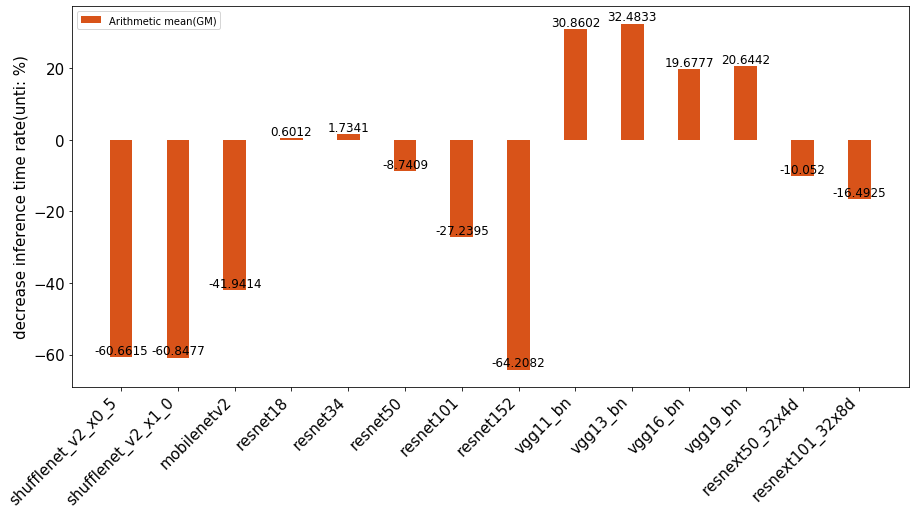

In [9]:
model_name_list, float32_model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_float32_model_inference_time(check_line_list)

decrease_memory_usage =  (1 - np.array(model_mean_list)/ np.array(float32_model_mean_list))*100
print(decrease_memory_usage)
x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar = plt.bar(x, decrease_memory_usage, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_memory_usage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([bar], ["Arithmetic mean(GM)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('decrease inference time rate(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "decrease inference time.png",dpi=500,bbox_inches = 'tight')

In [10]:
def get_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld.find_special_line_id(model_path)
        current_model_result_list = rld.read_line_vector(rld.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

['shufflenet_v2_x0_5_quantization', 'shufflenet_v2_x1_0_quantization', 'mobilenetv2_quantization', 'resnet18_quantization', 'resnet34_quantization', 'resnet50_quantization', 'resnet101_quantization', 'resnet152_quantization', 'vgg11_bn_quantization', 'vgg13_bn_quantization', 'vgg16_bn_quantization', 'vgg19_bn_quantization', 'resnext50_32x4d_quantization', 'resnext101_32x8d_quantization']
[12.736775, 19.234959, 11.498846, 13.068701, 15.357128, 16.68079, 21.659452, 26.73332, 20.891804, 25.894321, 30.705154, 35.44916, 18.419487, 38.239517]
[0.024576851269815236, 0.03225892796416119, 0.01797108635105893, 0.03577614402952811, 0.00947331251716399, 0.012537217982650617, 0.015475983134546567, 0.014538505019892511, 0.012123448767741962, 0.016056483335898264, 0.01634843839696387, 0.017862769399243916, 0.014775482818272678, 0.021738037486777273]
[12.735935038699797, 19.233973671399053, 11.498331816501894, 13.067006512869513, 15.357021133593419, 16.68061735389052, 21.659251343334443, 26.7331760188

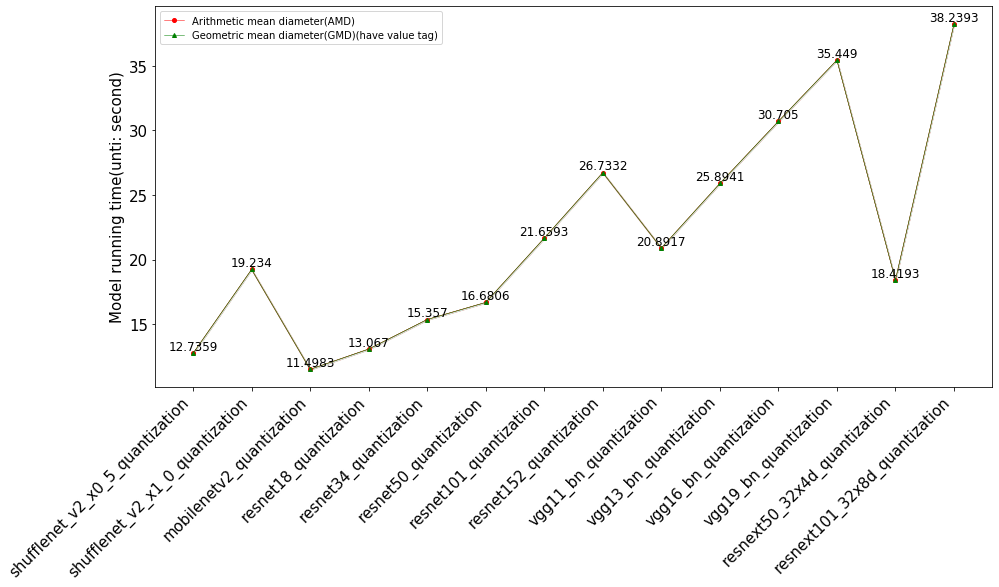

In [11]:
model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_running_time(check_line_list)
print(model_name_list)
print(model_mean_list)
print(model_mean_confinterval)
print(model_geo_mean_list)
print(model_geo_mean_confinterval)


x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

line1, = plt.plot(x_lable, model_mean_list, color='red', lw=0.5, ls='-', marker='o', ms=4)
line2, = plt.plot(x_lable, model_geo_mean_list, color='green', lw=0.5,  marker='^', ms=4)

plt.fill_between(x_lable, model_mean_list - model_mean_confinterval[0],model_mean_list + model_mean_confinterval[0], color=(240/256, 86/256, 79/256), alpha=0.9)
plt.fill_between(x_lable, model_geo_mean_list - model_geo_mean_confinterval[0], model_geo_mean_list + model_geo_mean_confinterval[0], color=(204/256, 236/256, 223/256), alpha=0.9)

#set second line show figure
for a, b in zip(x_lable, model_geo_mean_list):
    plt.text(a, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')

plt.legend([line1, line2], ["Arithmetic mean diameter(AMD)", "Geometric mean diameter(GMD)(have value tag)"], loc='upper left')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Model running time(unti: second)', fontsize = 15)
plt.savefig(save_root_path + "Model running time.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [12]:
def get_float32_model_running_time(estimate_line_list = []):
    model_name_list = []
    model_mean_list = []
    model_mean_confinterval = []
    model_geo_mean_list = []
    model_geo_mean_confinterval = []
    for current_estimate_line in estimate_line_list:
        model_path = rld_uq.read_model_path(current_estimate_line)
        if "scripted"  in model_path:
            current_model_name = ((model_path.split("/")[1]).split("scripted")[0])[:-1]# transform float32 model path to model name
        else:
            current_model_name = ((model_path.split("/")[1]).split("pretrained")[0])[:-1]# transform float32 model path to model name
        model_name_list.append(current_model_name)
        select_model_id_list = rld_uq.find_special_line_id(model_path)
        current_model_result_list = rld_uq.read_line_vector(rld_uq.read_running_time,select_model_id_list)

        ## mean information log
        mean_result = c.mean(current_model_result_list)
        model_mean_list.append(mean_result)
        meanInterval = c.mean_interval(arraylist = current_model_result_list)
        model_mean_confinterval.append(mean_result - meanInterval[0])

        ## Geo mean log
        geo_mean_result = c.geo_mean(current_model_result_list)
        model_geo_mean_list.append(geo_mean_result)
        geo_meanInterval = c.geo_mean_interval(arraylist = current_model_result_list)
        model_geo_mean_confinterval.append(geo_mean_result - geo_meanInterval[0])
    return model_name_list, model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval

[13.312544, 26.96716, 83.53202, 17.790768, 22.53123, 38.211304, 52.846188, 71.65009, 277.58932, 275.29953, 41.97046, 48.31354, 45.882286, 93.11032]
[12.736775, 19.234959, 11.498846, 13.068701, 15.357128, 16.68079, 21.659452, 26.73332, 20.891804, 25.894321, 30.705154, 35.44916, 18.419487, 38.239517]
[ 4.3250084 28.672653  86.23421   26.542234  31.840706  56.34593
 59.014164  62.689064  92.47385   90.594124  26.841032  26.626862
 59.854908  58.930958 ]


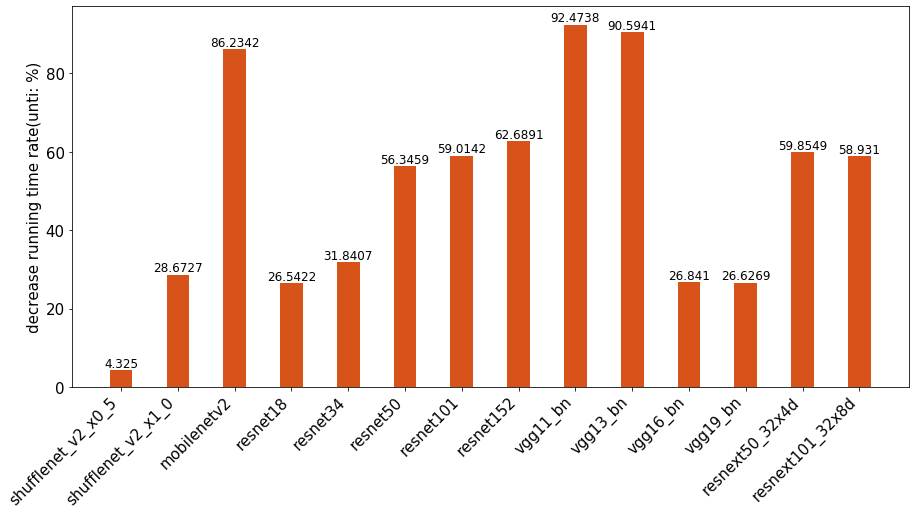

In [13]:
model_name_list, float32_model_mean_list, model_mean_confinterval, model_geo_mean_list, model_geo_mean_confinterval = get_float32_model_running_time(check_line_list)

print(float32_model_mean_list)
print(model_mean_list)
decrease_memory_usage = (1 -  np.array(model_mean_list)/ np.array(float32_model_mean_list))*100
print(decrease_memory_usage)
x_lable = model_name_list

x = np.arange(0,len(x_lable))
plt.figure(figsize=(len(x_lable)+1,7))

bar = plt.bar(x, decrease_memory_usage, bar_width, color=(217/256, 83/256, 25/256))

#show the bar spesific number
for x_axis, a, b in zip(x, x_lable, decrease_memory_usage):
    plt.text(x_axis, b+0.0015, round(b, 4), ha='center', va='bottom', fontsize=12)
    
plt.xticks(rotation=45)
plt.xticks(x,x_lable, horizontalalignment='right')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('decrease running time rate(unti: %)', fontsize = 15)
plt.savefig(save_root_path + "decrease running time.png",dpi=500,bbox_inches = 'tight')